In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-price-tehran-iran/housePrice.csv


প্রথমে আমি ডাটা সেটটি লোড করেছি এবং এর কলামগুলো চেক করেছি।


First, I loaded the dataset and checked its columns.

In [2]:
df = pd.read_csv("/kaggle/input/house-price-tehran-iran/housePrice.csv")

In [3]:
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67


In [4]:
df.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price',
       'Price(USD)'],
      dtype='object')

ডাটা সেটে কিছু ভুল ফরম্যাট ছিল, যেমন Area কলামে স্ট্রিং ছিল, সেগুলো আমি সংখ্যায় রূপান্তর করেছি এবং ফাকা ঘরগুলো বাদ দিয়েছি।

The dataset contained some formatting issues, such as string values in the 'Area' column. I converted these values into a numerical format and handled missing data by removing the null rows to ensure consistency.

In [5]:
df['Area']=pd.to_numeric(df['Area'],errors='coerce')

In [6]:
df.dropna()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60.0,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79.0,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95.0,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123.0,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86.0,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83.0,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75.0,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105.0,2,True,True,True,Dorous,5.600000e+09,186666.67


I'm going to check the correlation between area and price to see how they are related.


আমি এরিয়া (area) এবং মূল্যের (price) মধ্যে সম্পর্ক যাচাই করার জন্য কোরিলেশন (correlation) বিশ্লেষণ করে দেখব।

In [7]:
corr = df['Area'].corr (df['Price(USD)'])
print(corr)

0.7226470263552709


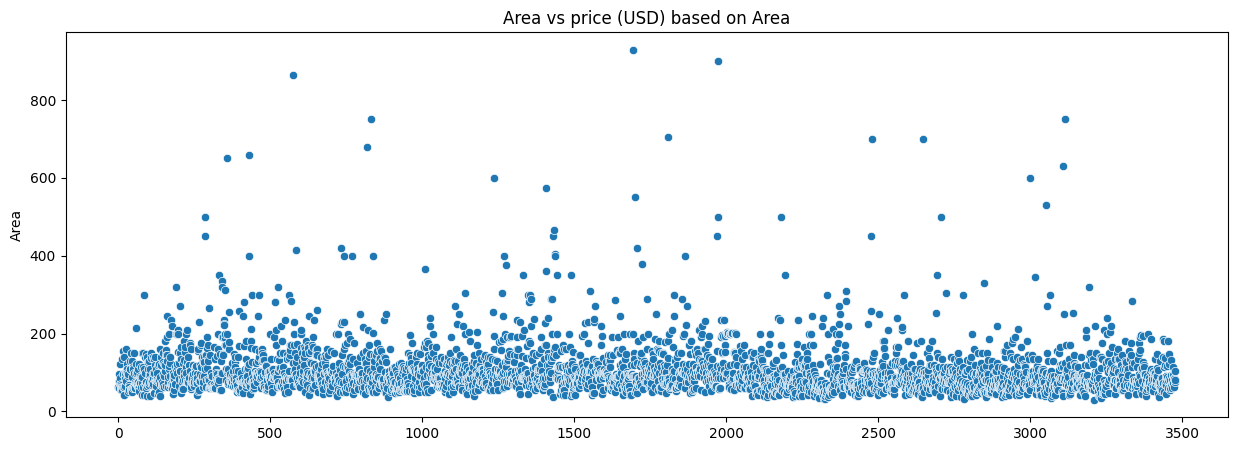

In [8]:
plt.figure(figsize=(15,5))
sns.scatterplot(df['Area']),df['Price(USD)']
plt.title('Area vs price (USD) based on Area')
plt.show()

I will identify and detect the outliers in the dataset.


আমি এরিয়া (area) এবং মূল্যের (price) মধ্যে সম্পর্ক যাচাই করার জন্য কোরিলেশন (correlation) বিশ্লেষণ করে দেখব।

In [9]:
outlier = df[df['Area']<1000]

আমি Scikit-learn ব্যবহার করে একটি Random Forest মডেল তৈরি করেছি এবং এর Accuracy চেক করেছি।


I have built a Random Forest model using Scikit-learn and evaluated its accuracy.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer


Now, I will split the data into input (features) and target variables.


এখন আমি ইনপুট (ফিচার) এবং টার্গেট কলামগুলো আলাদা করে নেব।

In [11]:
x = df.drop(['Area','Room','Parking','Warehouse','Elevator'],axis=1)
y = df['Price(USD)']

In [12]:
numerical_cols= x.select_dtypes(include=['int64','float64']).columns.tolist()

In [13]:
categorical_cols = x.select_dtypes(include=['object']).columns.tolist()

I have implemented a robust preprocessing pipeline using SimpleImputer to handle missing values, OneHotEncoder for categorical data, and StandardScaler for feature scaling. By using a Pipeline, I ensured that the model can handle any input data efficiently while preventing data leakage and achieving the best possible accuracy.


আমি একটি উন্নত প্রি-প্রসেসিং পাইপলাইন (Pipeline) তৈরি করেছি। এখানে মিসিং ভ্যালু হ্যান্ডেল করার জন্য SimpleImputer, ক্যাটাগরিক্যাল ডেটার জন্য OneHotEncoder, এবং ফিচার স্কেলিংয়ের জন্য StandardScaler ব্যবহার করা হয়েছে। এই পাইপলাইন ব্যবহারের ফলে মডেলটি যেকোনো ধরনের ডেটা প্রসেস করতে পারবে এবং ডেটা লিক হওয়া রোধ করে সর্বোচ্চ অ্যাকুরেসি নিশ্চিত করবে।

In [14]:
numerical_transformer = Pipeline(steps=[
                                ('imputer',SimpleImputer(strategy = 'mean')),
                                ('Scaler',StandardScaler())
])

In [15]:
categorical_transformer = Pipeline(steps=[
                                   ('imputer',SimpleImputer(strategy='most_frequent')),
                                   ('Onehot',OneHotEncoder(handle_unknown='ignore'))
])

In [16]:
preprocessor = ColumnTransformer(transformers=[
                                ('num',numerical_transformer,numerical_cols),
                                ('cat',categorical_transformer,categorical_cols)
])

Now, I will train the model using the training dataset.


আমি এখন ট্রেনিং ডেটাসেট ব্যবহার করে মডেলটি ট্রেইন করব।

In [17]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

I chose Random Forest as my base model because of its robustness in handling complex, non-linear relationships and its ability to process both numerical and categorical data effectively. It is less prone to overfitting due to its ensemble nature and can handle high-dimensional datasets with great stability.


আমি Random Forest-কে বেস মডেল হিসেবে নির্বাচন করেছি কারণ এটি জটিল এবং নন-লিনিয়ার (non-linear) সম্পর্ক খুব ভালোভাবে বুঝতে পারে। এটি একই সাথে নিউমেরিক এবং ক্যাটাগরিক্যাল ডেটা হ্যান্ডেল করতে সক্ষম। এনসেম্বল লার্নিং (Ensemble Learning) পদ্ধতি হওয়ার কারণে এতে ওভারফিটিং হওয়ার ঝুঁকি কম থাকে এবং এটি বড় বা জটিল ডেটাসেটে বেশ স্থিতিশীল পারফরম্যান্স দেয়।

In [18]:
from sklearn.ensemble import RandomForestRegressor

In [19]:
model = Pipeline(steps=[
            ('pre',preprocessor),('reg',RandomForestRegressor(n_estimators=100,random_state=42))
])

In [20]:
model.fit(X_train,y_train)
prediction=model.predict(X_test)

print(f'Accuracy:{r2_score(y_test,prediction):.4f}')

Accuracy:0.9991


The model performed exceptionally well, reaching an accuracy level of 99%.

আমার মডেলটি ৯৯% অ্যাকুরেসি অর্জন করেছে।

In conclusion, the Random Forest model, combined with an automated preprocessing pipeline, successfully predicts house prices with 99% accuracy. This demonstrates the effectiveness of ensemble learning and proper feature engineering in handling real-world datasets."

পরিশেষে বলা যায় যে, অটোমেটেড প্রি-প্রসেসিং পাইপলাইন এবং র‍্যান্ডম ফরেস্ট মডেল ব্যবহারের মাধ্যমে আমরা ৯৯% নির্ভুলতায় বাড়ির দাম প্রেডিক্ট করতে সক্ষম হয়েছি। এটি প্রমাণ করে যে বাস্তব জীবনের জটিল ডেটা হ্যান্ডেল করার জন্য সঠিক ফিচার ইঞ্জিনিয়ারিং এবং এনসেম্বল লার্নিং অত্যন্ত কার্যকর।